<a href="https://colab.research.google.com/github/TinozgDominic/AI2022/blob/main/MLP/MLP_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [43]:
from keras.datasets import cifar10

In [44]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f'Input shape: {x_train[0].shape}')
print(f'Output shape: {y_train[0].shape}')
print(f'Train size: {len(x_train)}')
print(f'Test size: {len(x_test)}')

Input shape: (32, 32, 3)
Output shape: (1,)
Train size: 50000
Test size: 10000


In [45]:
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)

print(f'Input shape: {x_train[0].shape}')

Input shape: (32, 32, 1)


In [46]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [47]:
print(f'Output shape: {y_train[0].shape}')

Output shape: (10,)


In [48]:
model = models.Sequential()

model.add(Flatten(input_shape = [32,32,1]))
model.add(layers.Dense(300, activation = 'relu'))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 300)               307500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 338,610
Trainable params: 338,610
Non-trainable params: 0
_________________________________________________________________


In [49]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback

callbacks = [Callback(), 
            EarlyStopping(patience=21, verbose=1),
            ReduceLROnPlateau(patience=5, verbose=1),
            ModelCheckpoint('MLP_Cifar10.h5', verbose=1, save_best_only=True)]

In [50]:
model.fit(x_train, y_train, epochs = 100, batch_size = 100,validation_data=(x_test, y_test), callbacks = callbacks)

Epoch 1/100
499/500 [============================>.] - ETA: 0s - loss: 17.6635 - accuracy: 0.1571
Epoch 1: val_loss improved from inf to 5.31997, saving model to MLP_Cifar10.h5
500/500 [==============================] - 9s 16ms/step - loss: 17.6375 - accuracy: 0.1570 - val_loss: 5.3200 - val_accuracy: 0.1450 - lr: 0.0010
Epoch 2/100
498/500 [============================>.] - ETA: 0s - loss: 4.1812 - accuracy: 0.1715
Epoch 2: val_loss improved from 5.31997 to 3.47459, saving model to MLP_Cifar10.h5
500/500 [==============================] - 9s 17ms/step - loss: 4.1769 - accuracy: 0.1715 - val_loss: 3.4746 - val_accuracy: 0.1603 - lr: 0.0010
Epoch 3/100
498/500 [============================>.] - ETA: 0s - loss: 2.7600 - accuracy: 0.1962
Epoch 3: val_loss improved from 3.47459 to 2.44514, saving model to MLP_Cifar10.h5
500/500 [==============================] - 7s 14ms/step - loss: 2.7590 - accuracy: 0.1961 - val_loss: 2.4451 - val_accuracy: 0.2065 - lr: 0.0010
Epoch 4/100
496/500 [======

In [57]:
classes = ('plane', 'car', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import random




1/1 [==============================] - 0s 17ms/step
Predict: ship
True mask: ship


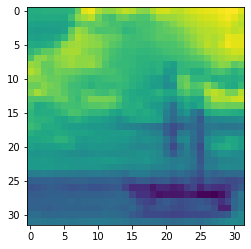

In [83]:
show = random.randint(0,9999)

plt.imshow(tf.reshape(x_test[show],[32,32]))
print('Predict:',classes[np.argmax(model.predict(x_test[show]), axis = 1)[0]])
print('True mask:',classes[np.argmax(y_test[show])])